In [6]:
import face_recognition

In [8]:
image = face_recognition.load_image_file("biden1.jpg")
face_locations = face_recognition.face_locations(image)
face_landmarks_list = face_recognition.face_landmarks(image)


In [9]:
known_image = face_recognition.load_image_file("biden1.jpg")
unknown_image = face_recognition.load_image_file("biden2.jpg")

biden_encoding = face_recognition.face_encodings(known_image)[0]
unknown_encoding = face_recognition.face_encodings(unknown_image)[0]

results = face_recognition.compare_faces([biden_encoding], unknown_encoding)

In [10]:
results

[True]

In [11]:
from PIL import Image
import face_recognition

# Load the jpg file into a numpy array
image = face_recognition.load_image_file("biden1.jpg")

# Find all the faces in the image using the default HOG-based model.
# This method is fairly accurate, but not as accurate as the CNN model and not GPU accelerated.
# See also: find_faces_in_picture_cnn.py
face_locations = face_recognition.face_locations(image)

print("I found {} face(s) in this photograph.".format(len(face_locations)))

for face_location in face_locations:

    # Print the location of each face in this image
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

    # You can access the actual face itself like this:
    face_image = image[top:bottom, left:right]
    pil_image = Image.fromarray(face_image)
    pil_image.show()

I found 1 face(s) in this photograph.
A face is located at pixel location Top: 31, Left: 127, Bottom: 74, Right: 170


## Image recognition

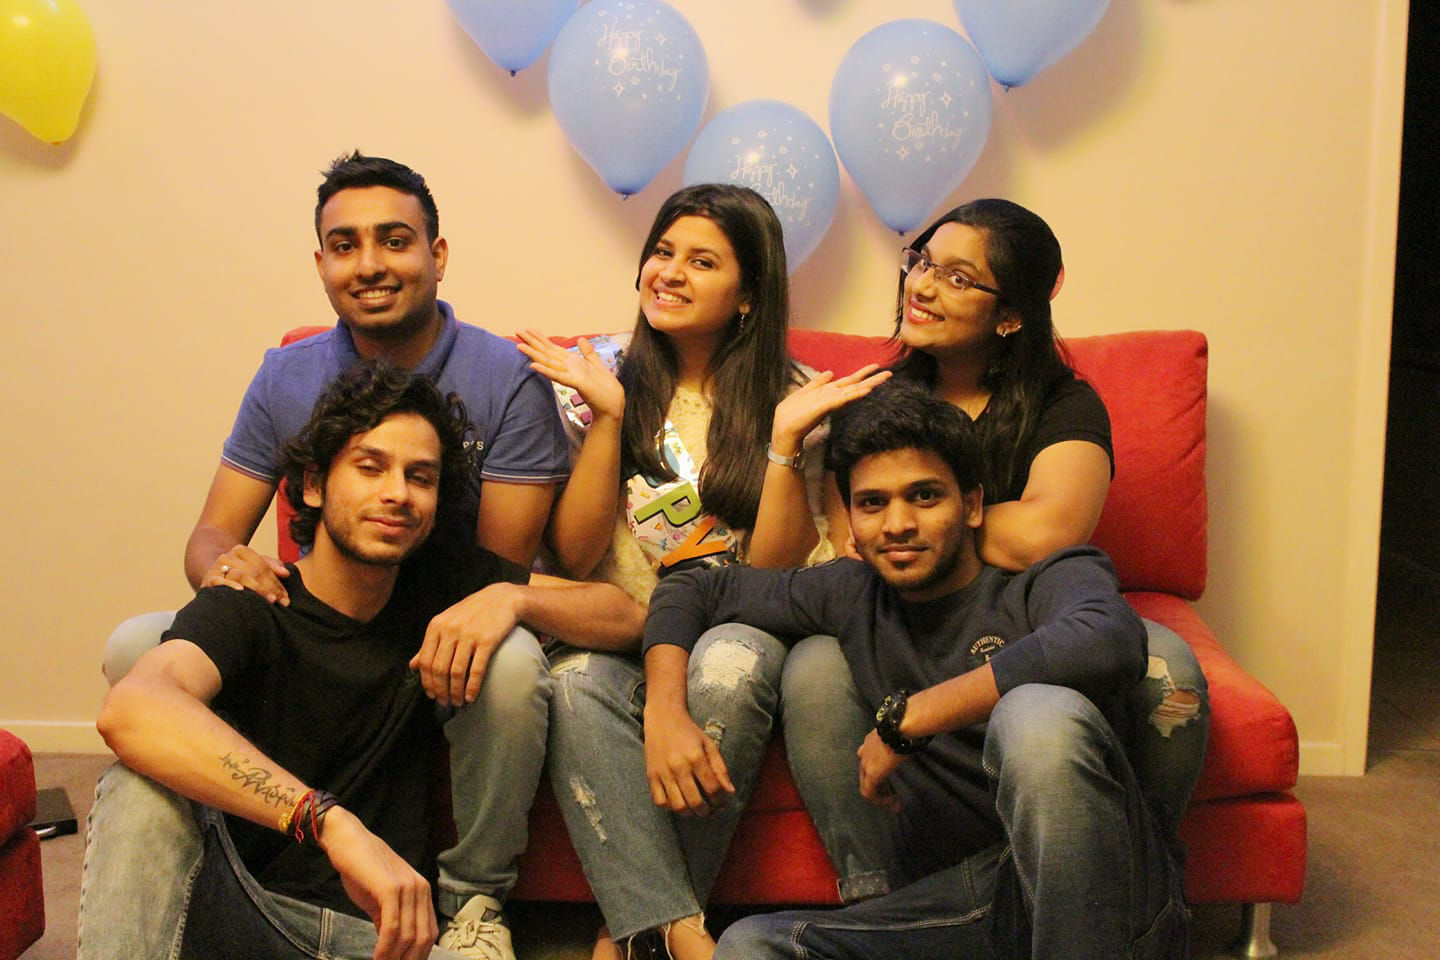

In [34]:
from PIL import Image, ImageDraw
from IPython.display import display

# The program we will be finding faces on the example below
pil_im = Image.open('group1.jpg')
display(pil_im)

In [42]:
import face_recognition
import numpy as np
from PIL import Image, ImageDraw
from IPython.display import display

# This is an example of running face recognition on a single image
# and drawing a box around each person that was identified.

# Load a sample picture and learn how to recognize it.
nikhil_image = face_recognition.load_image_file("nik.jpg")
nikhil_face_encoding = face_recognition.face_encodings(nikhil_image)[0]

# Load a second sample picture and learn how to recognize it.
soumya_image = face_recognition.load_image_file("Soumya.jpg")
soumya_face_encoding = face_recognition.face_encodings(soumya_image)[0]

sithika_image = face_recognition.load_image_file("sithika.jpg")
sithika_face_encoding = face_recognition.face_encodings(sithika_image)[0]

avi_image = face_recognition.load_image_file("avi.jpg")
avi_face_encoding = face_recognition.face_encodings(avi_image)[0]

# Create arrays of known face encodings and their names
known_face_encodings = [
    nikhil_face_encoding,
    soumya_face_encoding,
    sithika_face_encoding,
    avi_face_encoding
    
]
known_face_names = [
    "Nikhil",
    "Soumya",
    "Sithika",
    "Avi"
]
print('Learned encoding for', len(known_face_encodings), 'images.')

Learned encoding for 4 images.


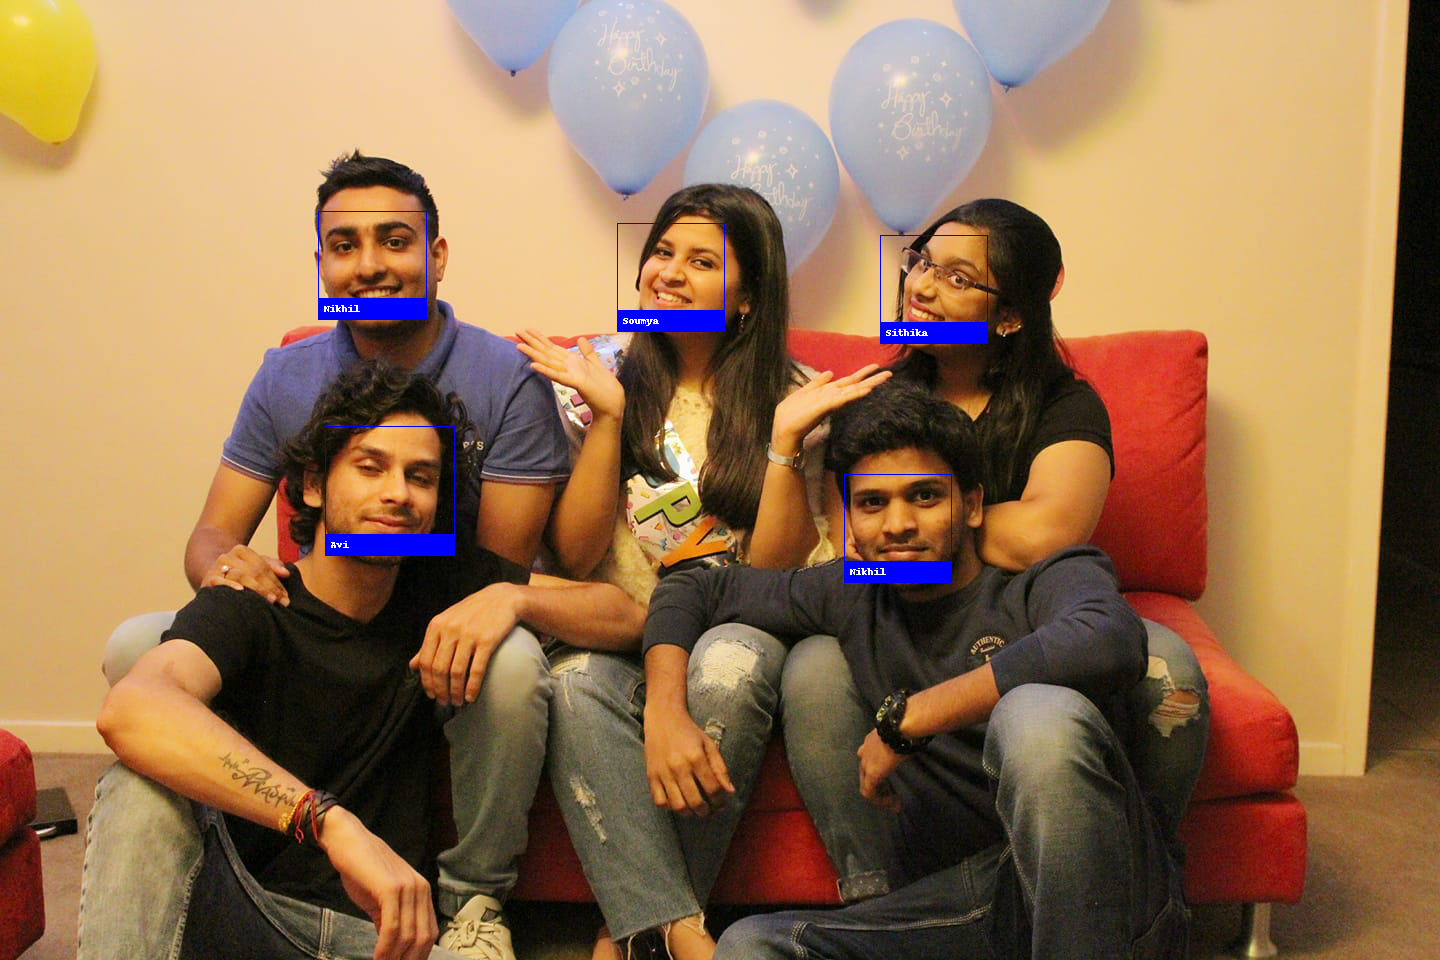

In [46]:
unknown_image = face_recognition.load_image_file("group1.jpg")

# Find all the faces and face encodings in the unknown image
face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

# Convert the image to a PIL-format image so that we can draw on top of it with the Pillow library
# See http://pillow.readthedocs.io/ for more about PIL/Pillow
pil_image = Image.fromarray(unknown_image)
# Create a Pillow ImageDraw Draw instance to draw with
draw = ImageDraw.Draw(pil_image)

# Loop through each face found in the unknown image
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    # See if the face is a match for the known face(s)
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

    name = "Unknown"

    # Or instead, use the known face with the smallest distance to the new face
    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    #print(face_distances)
    best_match_index = np.argmin(face_distances)
    #print(best_match_index)
    if matches[best_match_index]:
        name = known_face_names[best_match_index]

    # Draw a box around the face using the Pillow module
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))

    # Draw a label with a name below the face
    text_width, text_height = draw.textsize(name)
    draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(0, 0, 255), outline=(0, 0, 255))
    draw.text((left + 6, bottom - text_height - 5), name, fill=(255, 255, 255, 255))


# Remove the drawing library from memory as per the Pillow docs
del draw

# Display the resulting image
display(pil_image)